In [129]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from aux_funcs import zero_pad
import os
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

AVERAGING_SIZE = 20

color_set_1 = [
    '#E4F1F7',
    '#C5E1EF',
    '#9EC9E2',
    '#6CB0D6',
    '#3C93C2',
    '#226E9C',
    '#0D4A70',
    '#054166',
]

color_set_2 = [
    '#F9D8E6',
    '#F2ACCA',
    '#ED85B0',
    '#E95694',
    '#E32977',
    '#C40F5B',
    '#8F003B',
    '#69022c',
]

color_set_3 = [
    '#E6E6FA',
    '#D8BFD8',
    '#BA55D3',
    '#9370DB',
    '#8A2BE2',
    '#6A5ACD',
    '#4B0082',
    '#2E0854',
]


HIDDEN_SIZE = 32
INPUT_SIZE = 1

In [28]:
hypo_data = [
    'ramping_la_plus_min_150_2025-01-24_13_26_22_959852_var_noise_5e-05_activity_weight_1e-07',
    'ramping_la_plus_min_150_2025-01-24_13_26_24_985440_var_noise_5e-05_activity_weight_1e-07',
    'ramping_la_plus_min_150_2025-01-24_13_26_29_928663_var_noise_5e-05_activity_weight_1e-07',
    'ramping_la_plus_min_150_2025-01-24_13_26_33_203947_var_noise_5e-05_activity_weight_1e-07',
]

ctrl_data = [
    'glorot_init_int_2025-01-22_22_56_16_801291_var_noise_5e-05_activity_weight_1e-07',
    'glorot_init_int_2025-01-22_22_56_23_407526_var_noise_5e-05_activity_weight_1e-07',
    'glorot_init_int_2025-01-22_22_56_35_495048_var_noise_5e-05_activity_weight_1e-07',
    
]

In [29]:
all_w_hh_trained = []

for i_d, d in enumerate(ctrl_data):

    network_trained = GRU_RNN(
        input_size=INPUT_SIZE,
        hidden_size=HIDDEN_SIZE,
        device='cpu',
        var_noise=1e-7,
    )
    
    load_path = f'../../results/line_attr_supervised/{d}/rnn_weights/029999.h5'
    network_trained.load_state_dict(torch.load(load_path, weights_only=True))
    
    w_hh_trained = network_trained.rnn.weight_hh.detach().numpy()
    all_w_hh_trained.append(w_hh_trained)

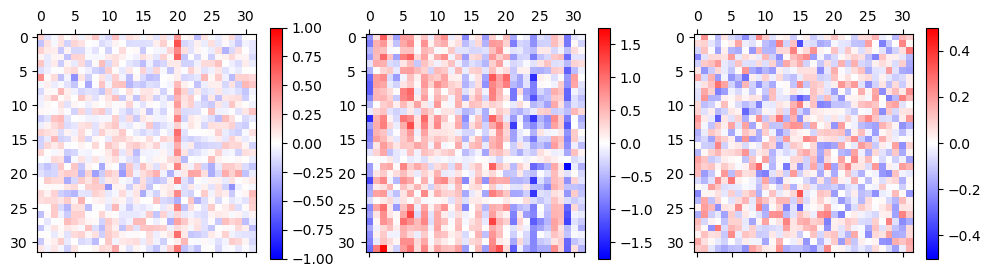

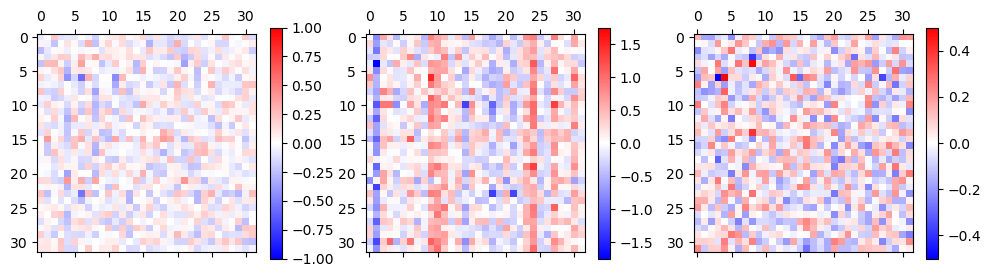

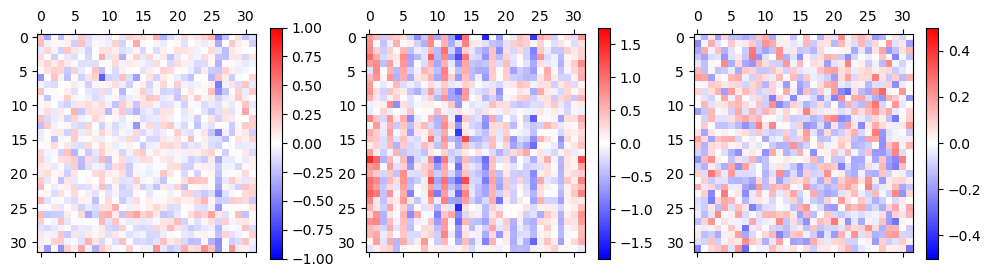

In [30]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
    
    maxes = [1, 1.75, 0.5]
    for k in range(3):
        cbar = axs[k].matshow(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-maxes[k], vmax=maxes[k], cmap='bwr')
        plt.colorbar(cbar)

In [130]:
all_w_hh_trained = []
all_w_out = []
all_b_out = []
all_w_ih_trained = []
all_b_ih_trained = []

timepoints = [0, 5, 10, 15, 3999]

for i_d, d in enumerate(hypo_data):

    model_w_hh_trained = []
    model_w_out = []
    model_b_out = []
    model_w_ih_trained = []
    model_b_ih_trained = []

    for t in timepoints:
        network_trained = GRU_RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,
            device='cpu',
            var_noise=1e-7,
        )
        padded_num = zero_pad(str(t), 6)
        load_path = f'../../results/line_attr_supervised/{d}/rnn_weights/{padded_num}.h5'
        network_trained.load_state_dict(torch.load(load_path, weights_only=True))
        
        w_hh_trained = network_trained.rnn.weight_hh.detach().numpy()
        model_w_hh_trained.append(w_hh_trained)
    
        model_w_out.append(network_trained.output_arm.weight.detach().numpy())
        model_b_out.append(network_trained.output_arm.bias.detach().numpy())

        model_w_ih_trained.append(network_trained.rnn.weight_ih.detach().numpy())
        model_b_ih_trained.append(network_trained.rnn.bias_ih.detach().numpy())

    all_w_hh_trained.append(np.stack(model_w_hh_trained))
    all_w_out.append(np.stack(model_w_out))
    all_b_out.append(np.stack(model_b_out))
    all_w_ih_trained.append(np.stack(model_w_ih_trained))
    all_b_ih_trained.append(np.stack(model_b_ih_trained))
    

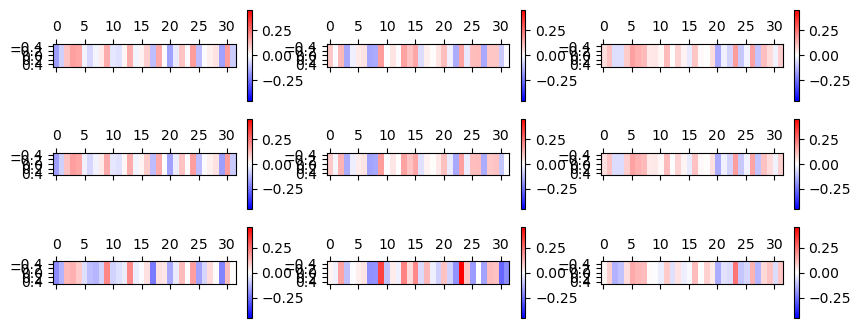

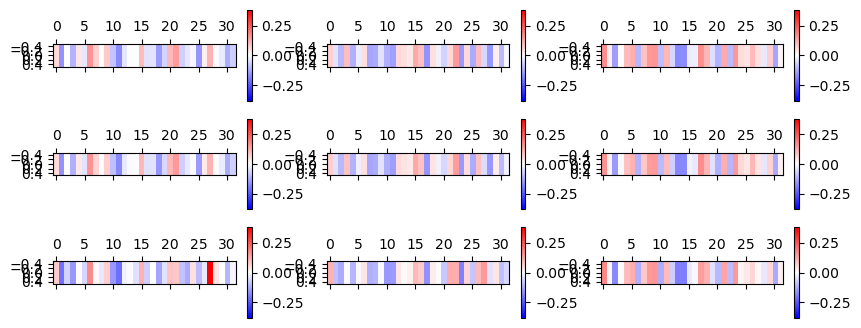

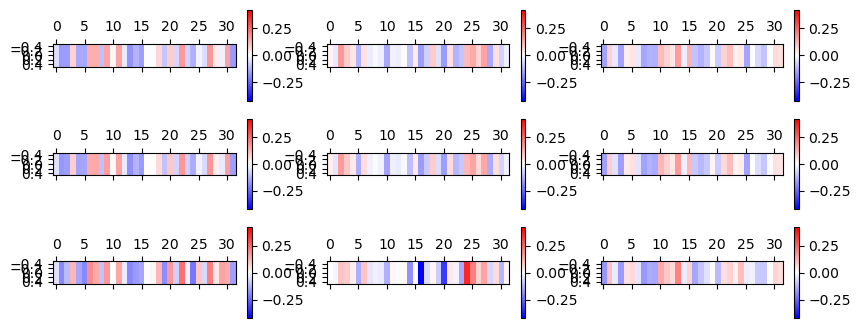

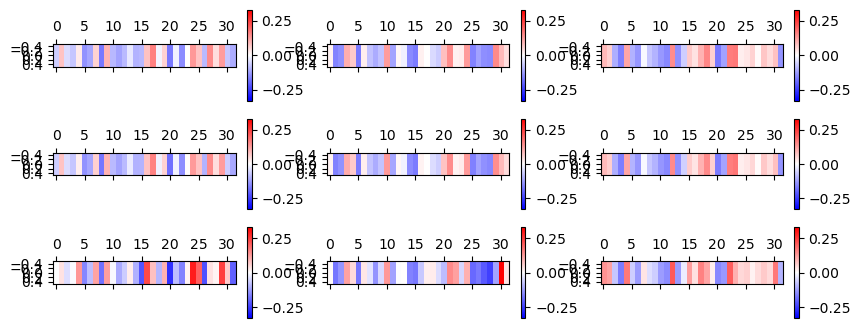

In [155]:
scale = 2

for w_in, b_in in zip(all_w_ih_trained, all_b_ih_trained):
    fig, axs = plt.subplots(3, 3, figsize=(5 * scale, 2 * scale))
    
    m = np.abs(w_in).max()

    for k in range(3):
        cbar = axs[0, k].matshow(w_in[0, k * HIDDEN_SIZE : (k+1) * HIDDEN_SIZE].T, vmin=-m, vmax=m, cmap='bwr', aspect=4)
        plt.colorbar(cbar)
        cbar = axs[1, k].matshow(w_in[1, k * HIDDEN_SIZE : (k+1) * HIDDEN_SIZE].T, vmin=-m, vmax=m, cmap='bwr', aspect=4)
        plt.colorbar(cbar)
        cbar = axs[2, k].matshow(w_in[4, k * HIDDEN_SIZE : (k+1) * HIDDEN_SIZE].T, vmin=-m, vmax=m, cmap='bwr', aspect=4)
        plt.colorbar(cbar)


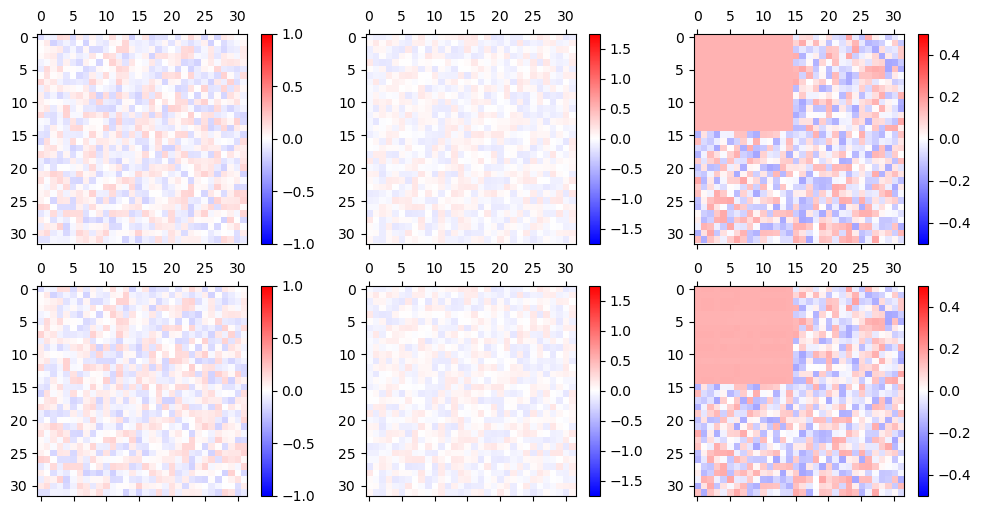

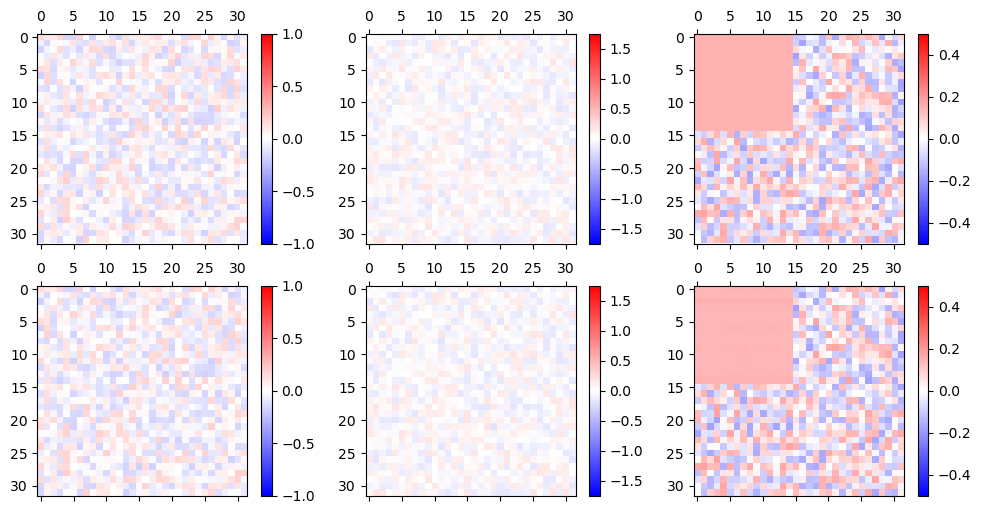

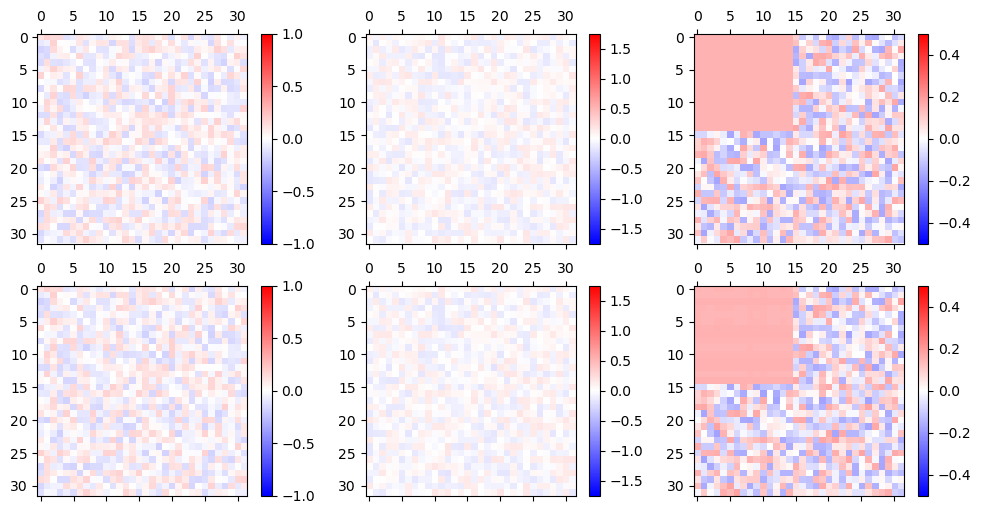

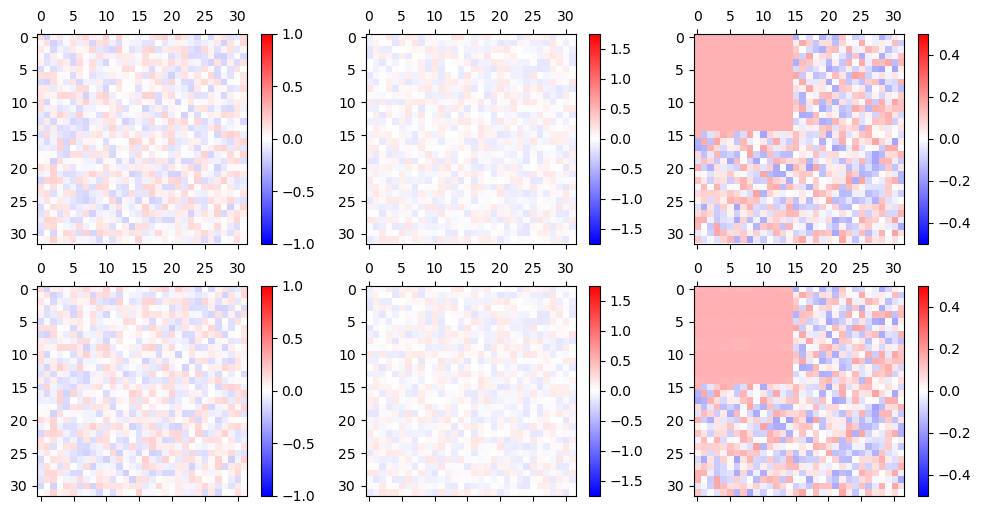

In [132]:
scale = 3

for w_hh_trained in all_w_hh_trained:
    fig, axs = plt.subplots(2, 3, figsize=(4 * scale, 2 * scale))
    
    maxes = [1, 1.75, 0.5]
    for k in range(3):
        cbar = axs[0, k].matshow(w_hh_trained[0, k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-maxes[k], vmax=maxes[k], cmap='bwr')
        plt.colorbar(cbar)
        cbar = axs[1, k].matshow(w_hh_trained[1, k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-maxes[k], vmax=maxes[k], cmap='bwr')
        plt.colorbar(cbar)

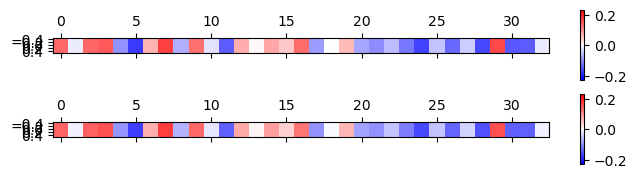

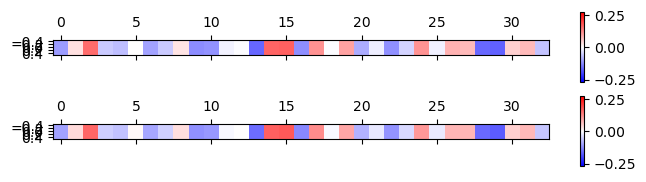

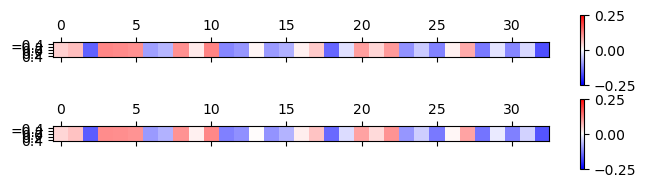

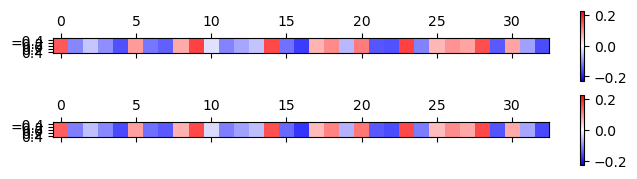

In [133]:
scale = 2

for w_out, b_out in zip(all_w_out, all_b_out):
    fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 1 * scale))
    
    m = np.abs(w_out).max()

    cbar = axs[0].matshow(np.concatenate([w_out[0], b_out[0, np.newaxis]], axis=1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)
    cbar = axs[1].matshow(np.concatenate([w_out[1], b_out[1, np.newaxis]], axis=1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)


In [134]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.stack(data)
    data = data.flatten()
    
    return np.convolve(data, np.ones(averaging_size) / averaging_size, 'same')

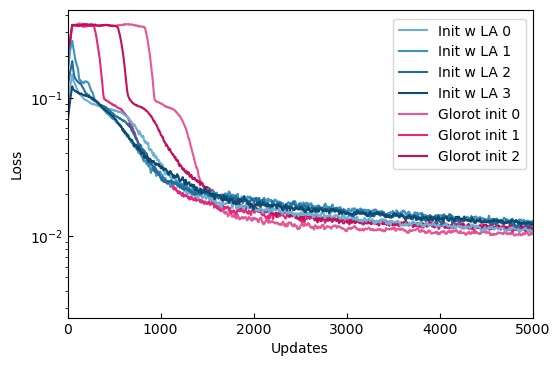

In [7]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

averaging_size = 100

for i_d, d in enumerate(hypo_data):
    data_dir = f'../../results/line_attr_supervised/{d}/losses'
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    axs.plot(
        np.arange(reduced_data.shape[0]),
        reduced_data,
        c=color_set_1[i_d + 3],
        zorder=1,
        label=f'Init w LA {i_d}',
    )

for i_d, d in enumerate(ctrl_data):
    data_dir = f'../../results/line_attr_supervised/{d}/losses'
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    axs.plot(
        np.arange(reduced_data.shape[0]),
        reduced_data,
        c=color_set_2[i_d + 3],
        zorder=0,
        label=f'Glorot init {i_d}',
    )


# axs.set_ylim(0)
axs.set_xlim(0, 5000)
axs.set_ylabel('Loss')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
axs.set_yscale('log')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

In [135]:
def load_numpy(data_path, averaging_size=1, concat_ax=0):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=concat_ax)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [136]:
hypo_data_test = [
    'ramping_la_plus_min_150_test_2025-01-28_14_55_20_677066_var_noise_5e-05_activity_weight_1e-07',
]

hidden_state_data = None
for i_d, d in enumerate(hypo_data_test):
    print(d)
    hs_path = f'../../results/line_attr_supervised/{d}/hidden_states/*.npy'
    o_path = f'../../results/line_attr_supervised/{d}/outputs/*.npy'
    hidden_state_data = load_numpy(hs_path)
    output_data = load_numpy(o_path, concat_ax=1)
    break

print(hidden_state_data.shape)

ramping_la_plus_min_150_test_2025-01-28_14_55_20_677066_var_noise_5e-05_activity_weight_1e-07
(2000, 32, 500)


(2, 2000)


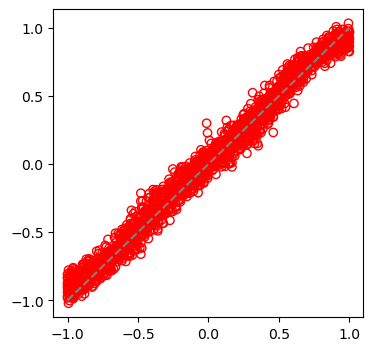

In [75]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

# output_data = output_data.reshape((2, 2000), order='F')
print(output_data.shape)

cbar = axs.scatter(output_data[1, :], output_data[0, :], edgecolor='red', facecolor='none')
axs.plot([-1, 1], [-1, 1], '--', c='gray')

[-1.0217644  -1.0019814  -0.98777485 ...  0.9937761   1.0077386
  1.0329754 ]
0
200
400
600
800
1000
1200
1400
1600
1800


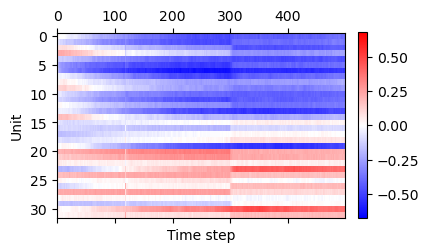

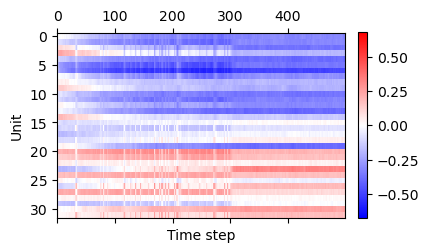

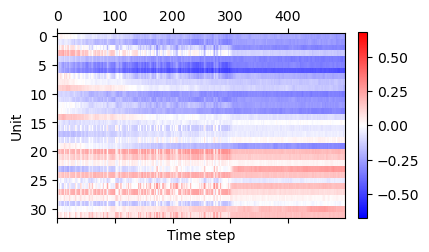

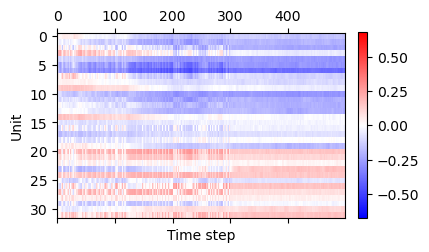

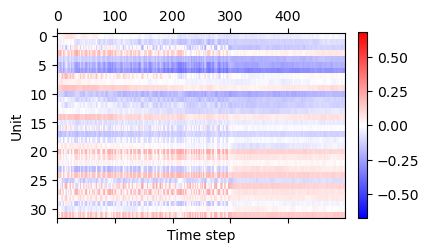

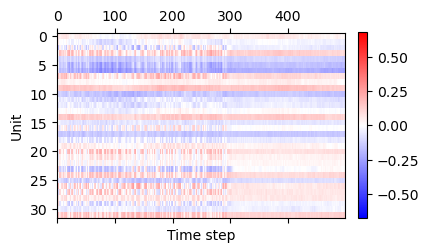

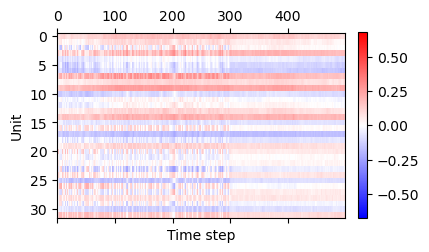

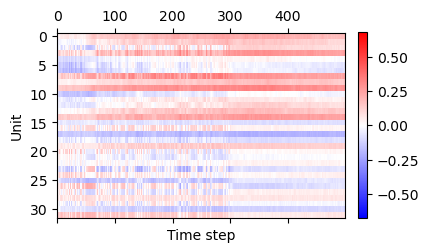

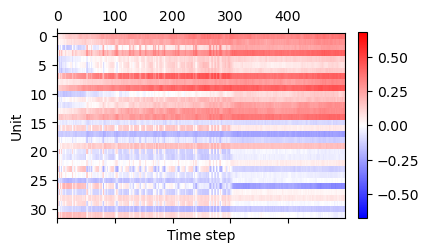

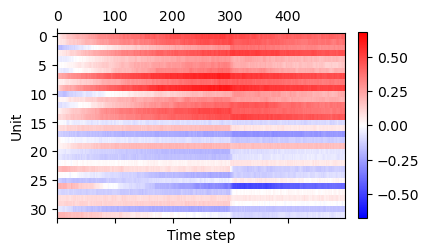

In [76]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=10)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

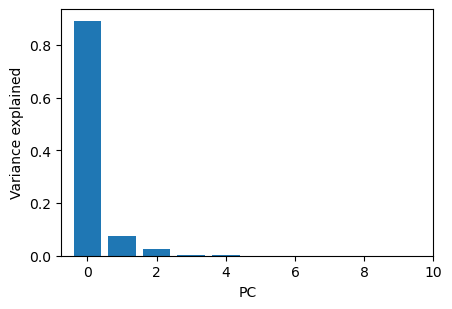

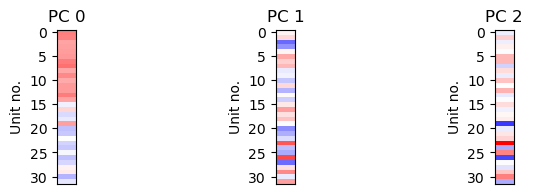

In [77]:
data_ = np.transpose(hidden_state_data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

scale = 2

fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
m = np.abs(pca.components_[:3, :]).max()
for i in range(3):
    axs[i].matshow(pca.components_[i, :].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
    axs[i].set_xticks([])
    axs[i].set_ylabel('Unit no.')
    axs[i].set_title(f'PC {i}')

In [137]:
def gen_alignment_chart(w, vs, vlim=None, title='', bias=None):
    if bias is None:
        bias = np.zeros_like(w)
    if vlim is None:
        vlim = vs.shape[0]
    vs = vs[:vlim, :]
    w_norm = np.linalg.norm(w)
    scale = 0.6
    
    # Set the figure and axes
    width = 3 * scale
    if (np.sum(bias) == 0):
        fig, axs = plt.subplots(1, 1, figsize=(width, 4 * scale), sharex=True, sharey=True)
        axs = [axs]
    else:
        fig, axs = plt.subplots(1, 2, figsize=(2 * width, 4 * scale), sharex=True, sharey=True)

    # Define indices for the bars
    indices = np.arange(vlim)
    
    # Calculate the alignments
    alignments = np.dot(vs, w / w_norm)
    print(alignments)
    
    # Create the horizontal bar chart
    axs[0].barh(indices, alignments, height=0.7)
    # Set the title with a specific font weight
    axs[0].set_title(f'{title}\nLength: {w_norm:.2f}', fontsize=12, fontweight='bold', pad=20)
    
    if not (np.sum(bias) == 0):
        axs[1].barh(indices, np.dot(vs, (w - bias) / np.linalg.norm(w - bias)), height=0.7)
        axs[1].set_title(f'After bias', fontsize=12, fontweight='bold', pad=20)

    # Customize the axes labels and limits
    axs[0].set_xlim(-1, 1)
    axs[0].set_ylim(-0.5, vlim - 0.5)

    for k in range(len(axs)):
        # Hide the top and right spines for a cleaner look
        axs[k].spines['top'].set_visible(False)
        axs[k].spines['right'].set_visible(False)
    
        # Thicken the axes lines (left, bottom)
        axs[k].spines['left'].set_linewidth(2)
        axs[k].spines['bottom'].set_linewidth(2)
        
        # Add gridlines for better readability
        axs[k].grid(True, axis='x', linestyle='--', alpha=0.6)
    
        # Adjust ticks and labels
        axs[k].tick_params(axis='both', labelsize=12, length=6)
    
    axs[0].set_xlabel('Alignment')
    axs[0].set_ylabel('PC')

    # Show the plot
    plt.tight_layout()

[0.5039444  0.77379507 0.06000341]
[0.4963408  0.78432375 0.06271659]
[0.48858583 0.79203343 0.06413852]
[0.48281527 0.800254   0.06520366]
[0.25887972 0.9258877  0.10826768]


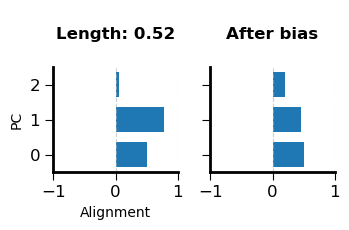

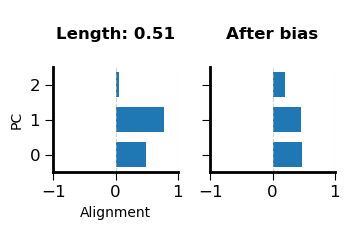

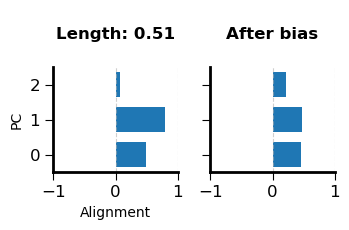

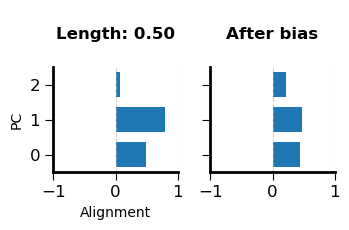

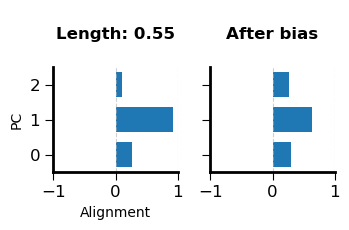

In [142]:
for i in range(5):
    gen_alignment_chart(
        all_w_ih_trained[0][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
        pca.components_[:3, :],
        bias=all_b_ih_trained[0][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
    )

[ 0.4043392  -0.13020511 -0.0959575 ]
[ 0.4272256  -0.14713985 -0.09009673]
[ 0.43580377 -0.15407294 -0.08762178]
[ 0.44888455 -0.15810299 -0.08493282]
[ 0.67631567 -0.13749143 -0.06633737]


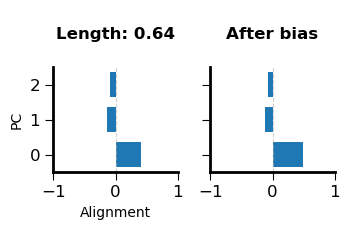

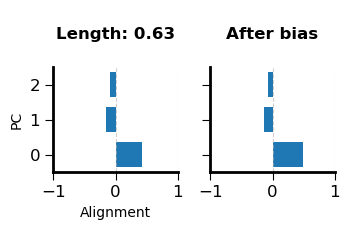

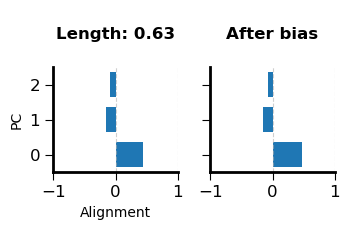

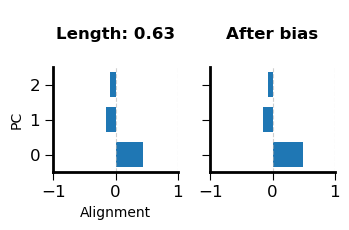

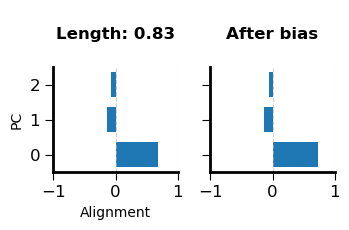

In [143]:
for i in range(5):
    gen_alignment_chart(
        all_w_out[0][i, :].flatten(),
        pca.components_[:3, :],
        bias=all_b_out[0][i],
    )

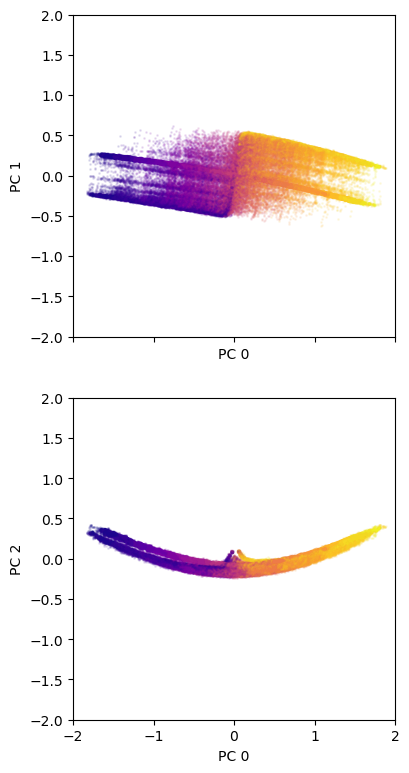

In [109]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
for i in range(2):
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_aspect('equal')
    # fig.colorbar(cbar)
fig.tight_layout()

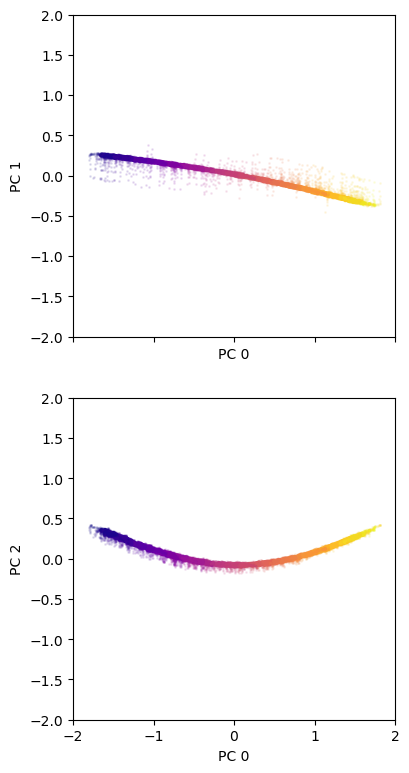

In [110]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx + 300:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
for i in range(2):
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_aspect('equal')
    # fig.colorbar(cbar)
fig.tight_layout()

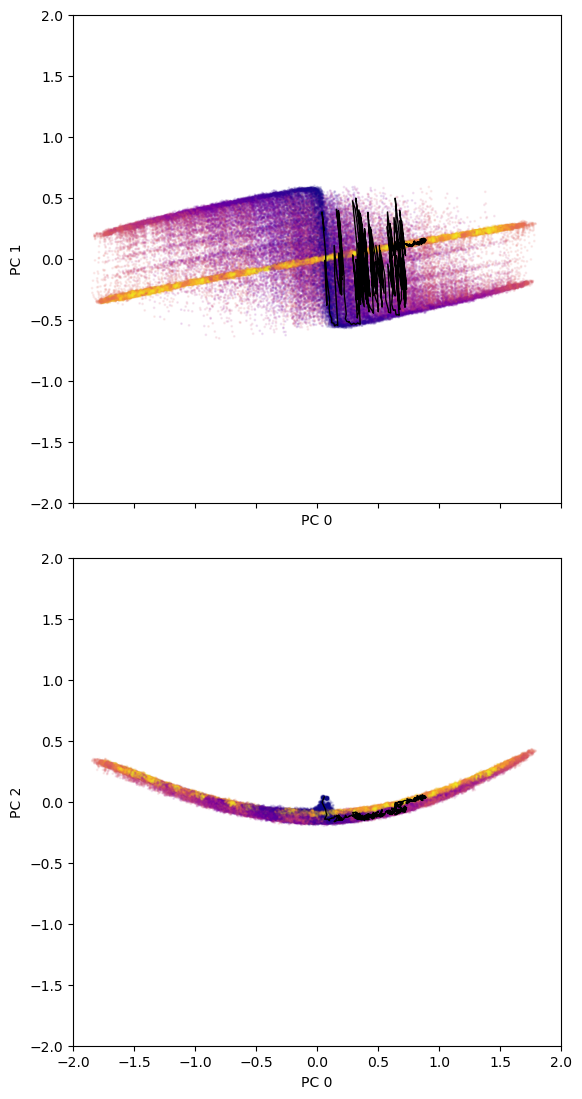

In [150]:
scale = 1.4
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 501))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[np.arange(500)],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[np.arange(500)],
        alpha=0.1,
        # vmax=2,
    )

    if run_idx == 5:
        cbar = axs[0].plot(
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
            lw=1,
            color='black',
            alpha=1.,
            # vmax=2,
        )
        cbar = axs[1].plot(
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
            pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
            lw=1,
            color='black',
            alpha=1.,
            # vmax=2,
        )

        # print(output_data[0, run_idx])
        
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
for i in range(2):
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_aspect('equal')
    # fig.colorbar(cbar)
fig.tight_layout()

In [144]:
hypo_data_test = [
    'ramping_la_plus_min_150_test_2025-01-30_10_41_00_228014_var_noise_5e-05_activity_weight_1e-07',
]

hidden_state_data = None
for i_d, d in enumerate(hypo_data_test):
    print(d)
    hs_path = f'../../results/line_attr_supervised/{d}/hidden_states/*.npy'
    o_path = f'../../results/line_attr_supervised/{d}/outputs/*.npy'
    hidden_state_data = load_numpy(hs_path)
    output_data = load_numpy(o_path, concat_ax=1)
    break

print(hidden_state_data.shape)

ramping_la_plus_min_150_test_2025-01-30_10_41_00_228014_var_noise_5e-05_activity_weight_1e-07
(2000, 32, 500)


[-1.0131521  -0.9955138  -0.98924893 ...  1.0122799   1.0292813
  1.0522469 ]
0
200
400
600
800
1000
1200
1400
1600
1800


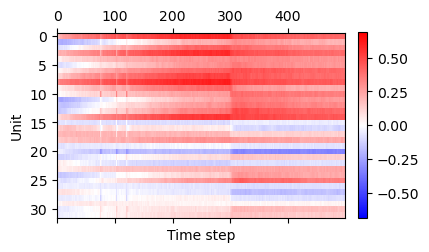

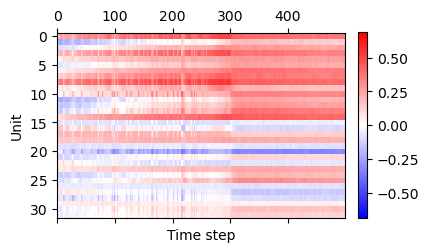

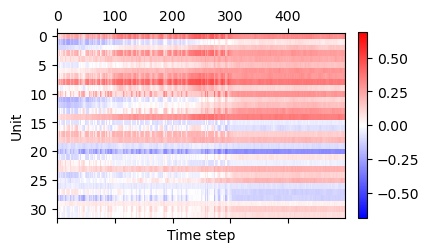

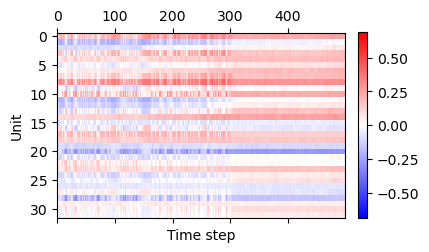

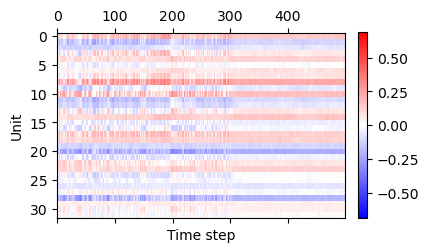

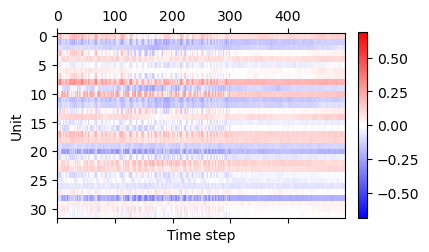

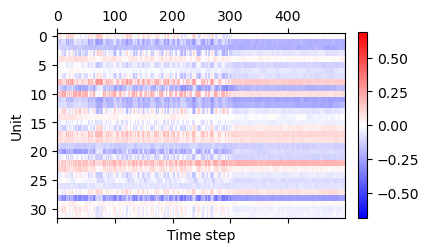

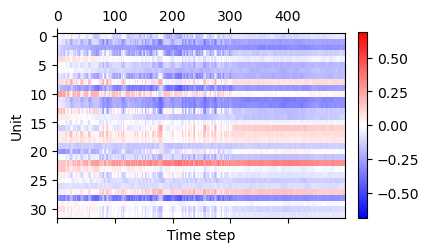

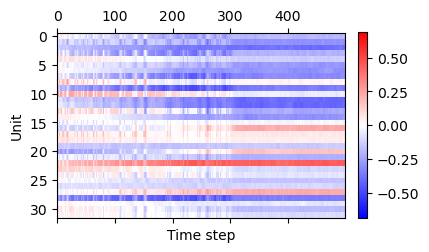

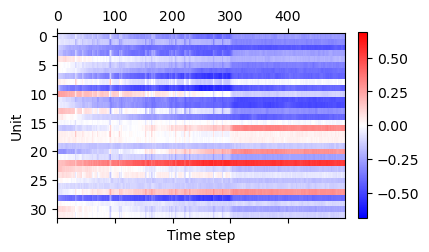

In [145]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=10)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

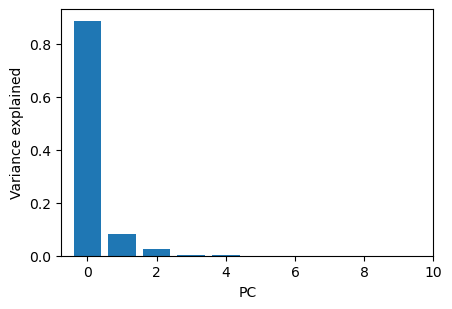

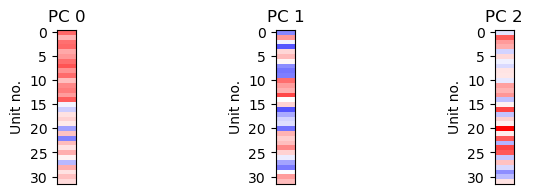

In [147]:
data_ = np.transpose(hidden_state_data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

scale = 2

fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
m = np.abs(pca.components_[:3, :]).max()
for i in range(3):
    axs[i].matshow(pca.components_[i, :].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
    axs[i].set_xticks([])
    axs[i].set_ylabel('Unit no.')
    axs[i].set_title(f'PC {i}')

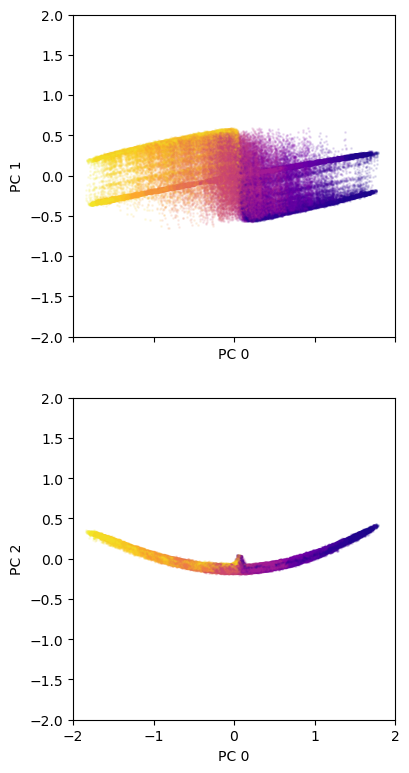

In [151]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
for i in range(2):
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_aspect('equal')
    # fig.colorbar(cbar)
fig.tight_layout()

[-0.2697608   0.8593941  -0.04251678]
[-0.29536238  0.8474347  -0.0363525 ]
[-0.32488644  0.8442061  -0.03918477]
[-0.34314495  0.8424933  -0.05345386]
[-0.15880242  0.9616842   0.02229013]


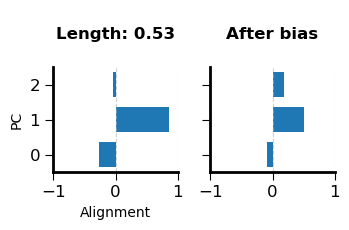

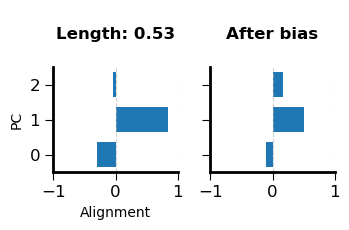

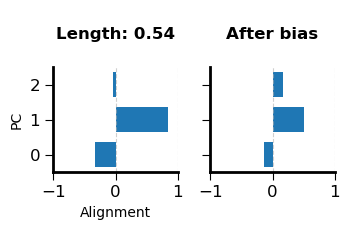

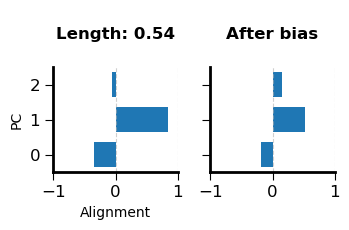

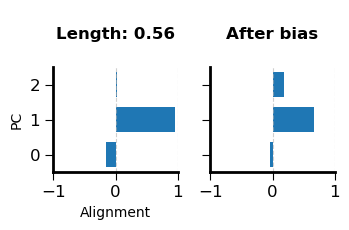

In [149]:
for i in range(5):
    gen_alignment_chart(
        all_w_ih_trained[2][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
        pca.components_[:3, :],
        bias=all_b_ih_trained[2][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
    )

[-0.2989447  -0.16394028  0.08738543]
[-0.33713436 -0.16431677  0.07594194]
[-0.34368747 -0.16571745  0.0751972 ]
[-0.36127603 -0.17034587  0.07639173]
[-0.69077533 -0.24415748  0.05434929]


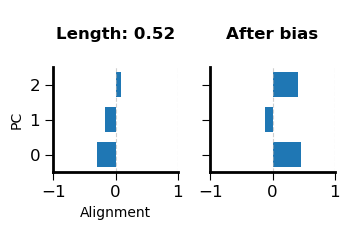

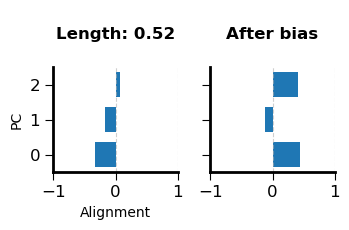

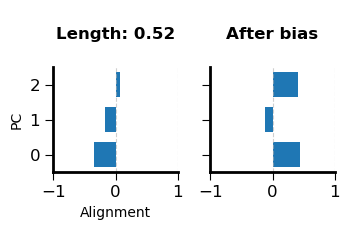

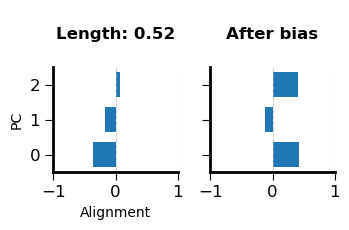

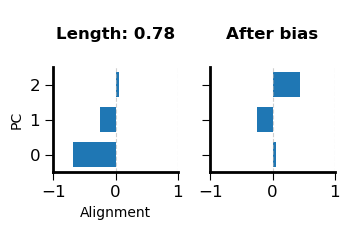

In [156]:
for i in range(5):
    gen_alignment_chart(
        all_w_out[2][i, :].flatten(),
        pca.components_[:3, :],
        bias=all_b_out[2][i],
    )

In [157]:
hypo_data_test = [
    'ramping_la_plus_min_150_test_2025-01-30_13_48_43_985440_var_noise_5e-05_activity_weight_1e-07',
]

hidden_state_data = None
for i_d, d in enumerate(hypo_data_test):
    print(d)
    hs_path = f'../../results/line_attr_supervised/{d}/hidden_states/*.npy'
    o_path = f'../../results/line_attr_supervised/{d}/outputs/*.npy'
    hidden_state_data = load_numpy(hs_path)
    output_data = load_numpy(o_path, concat_ax=1)
    break

print(hidden_state_data.shape)

ramping_la_plus_min_150_test_2025-01-30_13_48_43_985440_var_noise_5e-05_activity_weight_1e-07
(2000, 32, 500)


[-1.0569136 -1.0343516 -1.0342783 ...  0.9564305  0.9717641  0.9782667]
0
200
400
600
800
1000
1200
1400
1600
1800


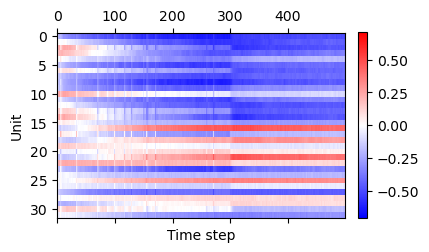

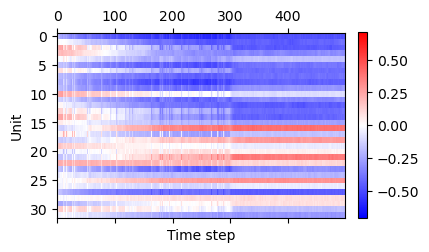

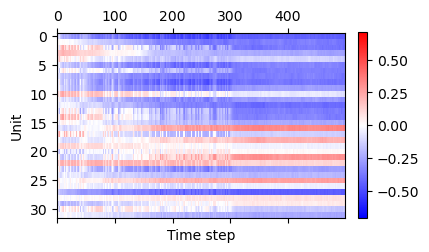

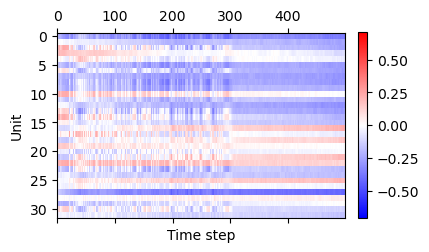

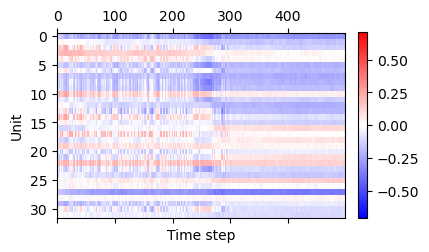

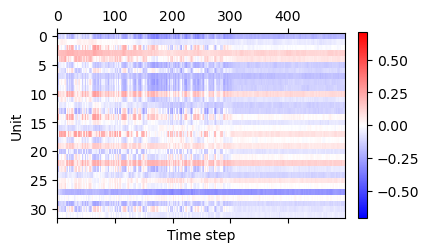

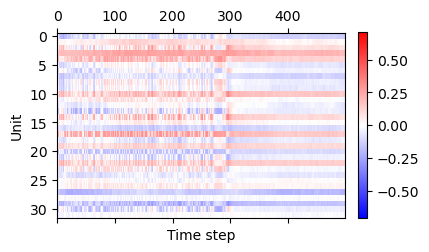

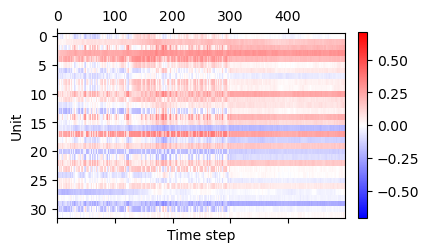

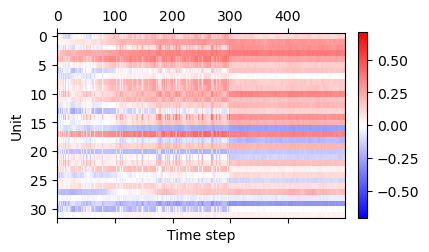

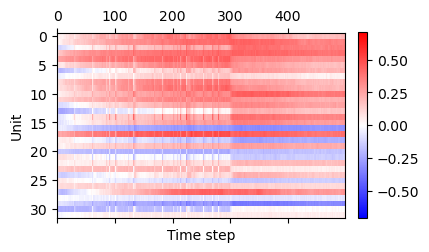

In [158]:
m = np.abs(hidden_state_data).max()

sorted_hidden_activity = hidden_state_data[output_data[0, :].argsort(), ...]

print(output_data[0, :][output_data[0, :].argsort()])

for k in range(0, 2000, 200):
    print(k)
    hidden_activity = sorted_hidden_activity[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')

    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=10)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

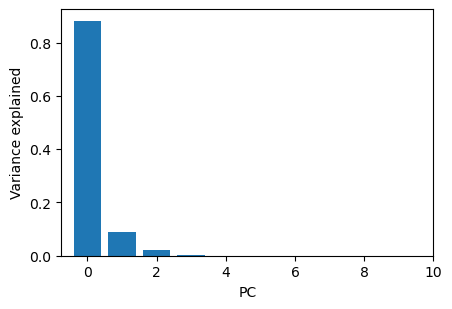

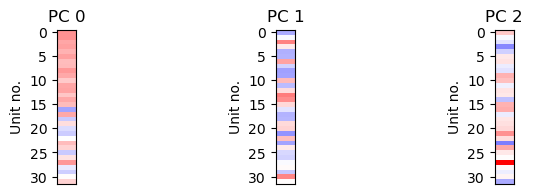

In [159]:
data_ = np.transpose(hidden_state_data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

scale = 2

fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))
m = np.abs(pca.components_[:3, :]).max()
for i in range(3):
    axs[i].matshow(pca.components_[i, :].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr', aspect=0.25)
    axs[i].set_xticks([])
    axs[i].set_ylabel('Unit no.')
    axs[i].set_title(f'PC {i}')

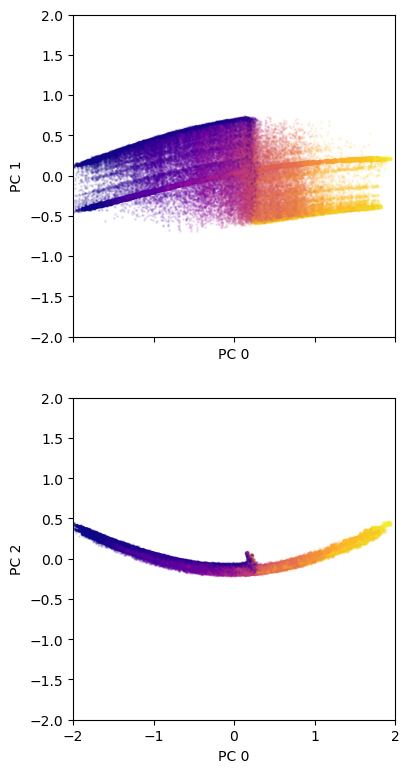

In [160]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 41))

for run_idx in range(0, 200, 1):
    cbar = axs[0].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 1],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
    cbar = axs[1].scatter(
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 0],
        pc_activities[hidden_state_data.shape[2] * run_idx:hidden_state_data.shape[2] * (run_idx + 1), 2],
        s=1,
        color=colors[int(20 * (1 + output_data[0, run_idx]))],
        alpha=0.1,
        # vmax=2,
    )
axs[0].set_xlabel(f'PC 0')
axs[0].set_ylabel(f'PC 1')
axs[1].set_xlabel(f'PC 0')
axs[1].set_ylabel(f'PC 2')
for i in range(2):
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_aspect('equal')
    # fig.colorbar(cbar)
fig.tight_layout()

[ 0.19883543 -0.95572394  0.01705058]
[ 0.1775214  -0.95098555  0.00974059]
[ 0.17374437 -0.95009303  0.00779903]
[ 0.17044178 -0.9486244   0.00626768]
[ 0.12038872 -0.97248286 -0.01451251]


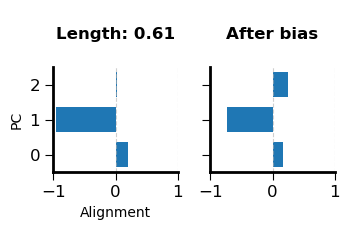

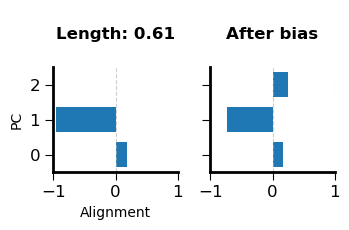

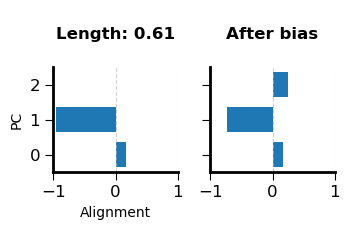

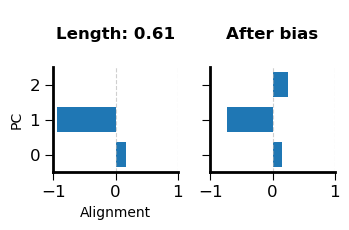

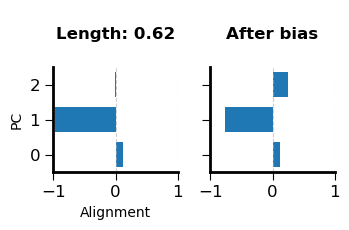

In [161]:
for i in range(5):
    gen_alignment_chart(
        all_w_ih_trained[1][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
        pca.components_[:3, :],
        bias=all_b_ih_trained[1][i, 2 * HIDDEN_SIZE: 3 * HIDDEN_SIZE].flatten(),
    )

[ 0.18486278  0.1668064  -0.03831792]
[ 0.22705297  0.17469141 -0.0416777 ]
[ 0.22791265  0.17476285 -0.04196964]
[ 0.23345524  0.17621072 -0.04227046]
[0.6341209  0.19558187 0.00690389]


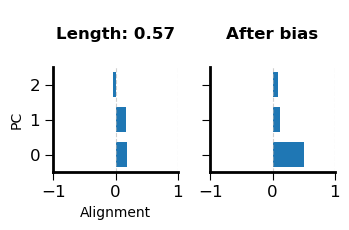

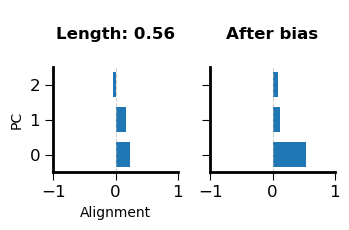

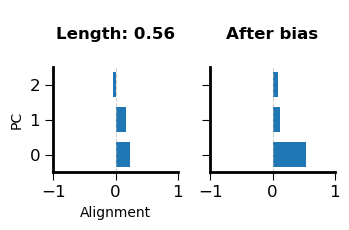

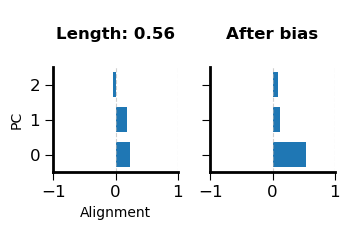

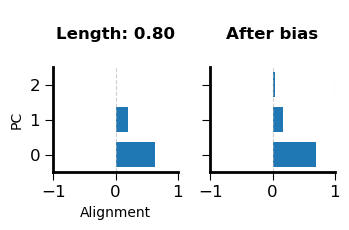

In [162]:
for i in range(5):
    gen_alignment_chart(
        all_w_out[1][i, :].flatten(),
        pca.components_[:3, :],
        bias=all_b_out[1][i],
    )